<a href="https://colab.research.google.com/github/ashwinmano/CRUD-React/blob/master/1840103_CIa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [75]:
url="/content/car data.csv"
df=pd.read_csv(url)
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
de=df[['Selling_Price', 'Present_Price','Kms_Driven']]
da=de.head(10)
da

,Selling_Price,Present_Price,Kms_Driven
0,3.35,5.59,27000
1,4.75,9.54,43000
2,7.25,9.85,6900
3,2.85,4.15,5200
4,4.60,6.87,42450
5,9.25,9.83,2071
6,6.75,8.12,18796
7,6.50,8.61,33429
8,8.75,8.89,20273
9,7.45,8.92,42367


Covariance

In [ ]:
covariance = da.cov(min_periods=None)
covariance

,Selling_Price,Present_Price,Kms_Driven
Selling_Price,4.760556,3.394667,-8.220306e+03
Present_Price,3.394667,3.673534,2.272141e+03
Kms_Driven,-8220.305556,2272.140889,2.560153e+08


Pearsons Correlation

In [ ]:
pearsoncorr =df.corr(method='pearson')
pearsoncorr

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


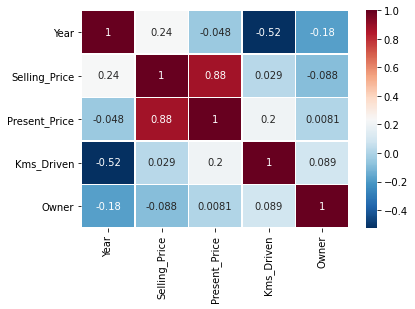

In [ ]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
list_of_selling  = da['Selling_Price']
list_of_present  = da['Present_Price']
list_of_kms = da['Kms_Driven']

In [ ]:
corr = stats.pearsonr(list_of_selling,list_of_present)
print('Correlation between Selling_Price and Present_Price columns:\n',corr)

Correlation between Selling_Price and Present_Price columns:
 (0.8117574047718893, 0.004347286932885836)


Label Encoding

In [105]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Transmission']=le.fit_transform(df['Transmission'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df.tail(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
281,city,2006,2.10,7.60,50456,2,0,1,0
282,city,2014,8.25,14.00,63000,1,0,1,0
283,city,2016,8.99,11.80,9010,2,0,1,0
284,brio,2013,3.50,5.90,9800,2,0,1,0
285,jazz,2016,7.40,8.50,15059,2,0,0,0
286,jazz,2016,5.65,7.90,28569,2,0,1,0
287,amaze,2015,5.75,7.50,44000,2,0,0,0
288,city,2015,8.40,13.60,34000,2,0,1,0
289,city,2016,10.11,13.60,10980,2,0,1,0
290,amaze,2014,4.50,6.40,19000,2,0,1,0


PCA


In [106]:
from sklearn.preprocessing import StandardScaler
features = ['Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']
x = df.loc[:, features].values
print(x[:3])
y = df.loc[:,['Car_Name']].values
x = StandardScaler().fit_transform(x)
print(x[:3])
x.shape

[[3.35e+00 5.59e+00 2.70e+04 2.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [4.75e+00 9.54e+00 4.30e+04 1.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [7.25e+00 9.85e+00 6.90e+03 2.00e+00 0.00e+00 1.00e+00 0.00e+00]]
[[-0.25841591 -0.23621461 -0.25622446  0.50018321 -0.73728539  0.39148015
  -0.17450057]
 [ 0.01748088  0.22150462  0.1559105  -1.85224094 -0.73728539  0.39148015
  -0.17450057]
 [ 0.51015372  0.25742689 -0.77396901  0.50018321 -0.73728539  0.39148015
  -0.17450057]]


(301, 7)

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principalDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.288886,-0.563785,0.108548,-0.118054
1,1.083229,-0.590524,1.145368,-0.315294
2,0.321506,-0.874029,-0.433518,-0.487198
3,-0.515504,-0.864992,-0.212276,-0.358210
4,0.898449,-0.616018,1.173510,-0.292359
5,1.431709,-1.227197,0.281970,-0.911034
6,0.204839,-0.715644,-0.197129,-0.314861
7,1.177837,-0.759173,0.925990,-0.459501
8,1.388265,-0.976303,0.612855,-0.669863
9,1.333711,-0.650742,1.029769,-0.374041


Processing

In [ ]:
df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


Regression Analysis

In [88]:
X = df[['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']].values.reshape(-1,7)
y = df[['Selling_Price']].values.reshape(-1,1)

In [89]:
model = LinearRegression()

In [90]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
model = LinearRegression().fit(X,y)

In [92]:
r_sq = model.score(X,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8785205982910809


In [93]:
print('intercept:', model.intercept_)
intercept: 5.633333333333329
print('slope:', model.coef_)
slope: [0.54]

intercept: [-807.57797279]
slope: [[ 4.03947271e-01  4.45986832e-01 -6.37410323e-06 -1.49298752e+00
  -1.10367889e+00 -1.43041666e+00 -6.80557441e-01]]


In [94]:
y_pred = model.predict(X)

In [95]:
de = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
de

,Actual,Predicted
0,3.35,3.876404
1,4.75,6.625107
2,7.25,7.116269
3,2.85,2.161297
4,4.60,5.841775
...,...,...
296,9.50,8.813125
297,4.00,4.208262
298,3.35,3.881057
299,11.50,9.777736


In [96]:
import plotly.express as px
fig = px.scatter(de, x="Actual", y="Predicted", color='Predicted', marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [97]:
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 3.1279904666578924


In [98]:
from sklearn.metrics import r2_score
print("R**2 Value:\ncoefficient of determination:", r2_score(y, y_pred))

R**2 Value:
coefficient of determination: 0.878520598291081
